In [3]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from lmfit.lineshapes import *
from lmfit.models import GaussianModel, LorentzianModel, ExponentialModel, PolynomialModel, VoigtModel
from scipy import signal as sig
from scipy import optimize as opt
import peakutils

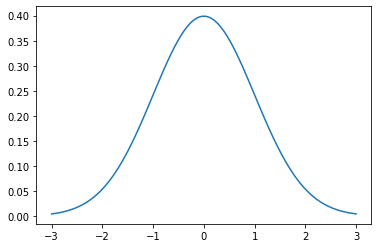

In [4]:
# Define basic gaussian function: A = amplitude, mu = mean, sigma = standard deviation
def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

# Generate example data and plot gaussian function
x = np.linspace(-3, 3, 100)
y = g(x, 1, 0, 1) 
fig, ax = plt.subplots()
ax.plot(x, g(x, 1, 0, 1))

In [5]:
# Load the pre-built gaussian model found with the lmfit module.
model = GaussianModel()
pars = model.guess(y, x=x)  #The parameters for the gaussian module (amplitude, mean, sigma) are guessed by input
out = model.fit(y, pars, x=x) # Fit of gaussian model to input data

In [6]:
print(out.fit_report(min_correl = 0.25)) # Fit Report

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 2.8257e-31
    reduced chi-square = 2.9131e-33
    Akaike info crit   = -7488.65465
    Bayesian info crit = -7480.83914
##  Warning: uncertainties could not be estimated:
    center:     at initial value
[[Variables]]
    amplitude:  1.00000000 (init = 1.326374)
    center:     7.0119e-17 (init = 7.011935e-17)
    sigma:      1.00000000 (init = 1.121212)
    fwhm:       2.35482000 == '2.3548200*sigma'
    height:     0.39894230 == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


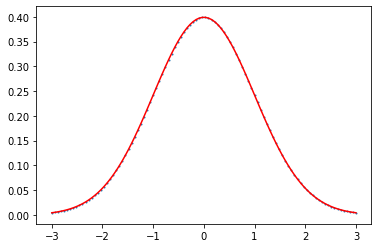

In [7]:
# Plot of original data and gaussian model fit
plt.scatter(x, y, 1)
plt.plot(x, out.best_fit, color = 'red')
plt.show()

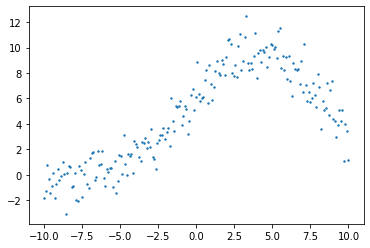

In [8]:
# Generate a gaussian function with a random spread in data points
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)

In [9]:
# Generate gaussian model based on initial guess from the data
model1 = GaussianModel()
pars1 = model1.guess(y, x=x)
out1 = model1.fit(y, pars1, x=x)
print(out1.fit_report(min_correl  = 25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 255.184176
    reduced chi-square = 1.29535115
    Akaike info crit   = 54.7336353
    Bayesian info crit = 64.6285874
[[Variables]]
    amplitude:  100.876595 +/- 1.89850906 (1.88%) (init = 262.4145)
    center:     3.98143641 +/- 0.08590518 (2.16%) (init = 3.914573)
    sigma:      4.09774913 +/- 0.09492005 (2.32%) (init = 5.628141)
    fwhm:       9.64946161 +/- 0.22351964 (2.32%) == '2.3548200*sigma'
    height:     9.82098694 +/- 0.16913153 (1.72%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


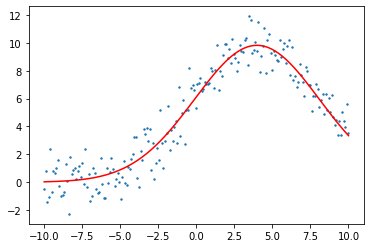

In [10]:
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)
plt.plot(x, out1.best_fit, color = 'red') # Plot of best fit

In [11]:
# Generation of random set of input data
np.random.seed(0)
x = np.linspace(0, 20.0, 601)

# Generate a multipeak function consisting of gaussian and lorentzian peaks
data = (gaussian(x, 21, 6.1, 1.2) + gaussian(x, 10, 9.6, 1.3) + lorentzian(x, 32, 15, 1) +
        np.random.normal(scale=0.1, size=x.size))

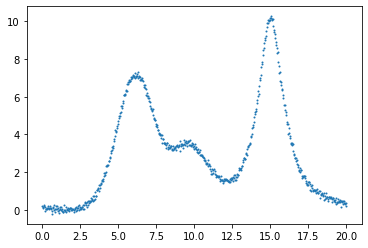

In [12]:
plt.scatter(x, data, 1)

In [13]:
# Create models

gauss_1 = GaussianModel(prefix = 'g1_')  #First Gaussian Model using input data for initial parameter guess
par = gauss_1.guess(data, x = x)

gauss_2 = GaussianModel(prefix = 'g2_') #Second Gaussian Model updating parameters from first fit
par.update(gauss_2.make_params())

par['g2_center'].set(value = 10.0, min = 7.5, max = 12.0) # Setting mean for second gaussian with min/max range
par['g2_sigma'].set(value = 4, min = 0.1) # Setting deviation for second gaussian with min value limit
par['g2_amplitude'].set(value = 20, min = 1) # Setting amplitude for second gaussian with min value limit

lorentzian = LorentzianModel(prefix = 'l1_') # Lorentzian model
par.update(lorentzian.make_params())

par['l1_center'].set(value = 15.0, min = 13.5, max = 18.0) # Initial guess for the mean, amplitude and sigma
par['l1_sigma'].set(value = 4.0, min = 1)
par['l1_amplitude'].set(value = 40, min = 9.0)

In [14]:
model = gauss_1 + gauss_2 + lorentzian  # Combined model for the data
out = model.fit(data, par, x = x) # Best fit of input data
print(out.fit_report())

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(lorentzian, prefix='l1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7471
    # data points      = 601
    # variables        = 9
    chi-square         = 6.96927973
    reduced chi-square = 0.01177243
    Akaike info crit   = -2660.70692
    Bayesian info crit = -2621.11956
##  Warning: uncertainties could not be estimated:
    l1_sigma:      at boundary
[[Variables]]
    g1_amplitude: -7500.64092 (init = 171.0675)
    g1_center:     7.73015157 (init = 10.5062)
    g1_sigma:      1.46423496 (init = 5.45)
    g1_fwhm:       3.44800977 == '2.3548200*g1_sigma'
    g1_height:    -2043.60845 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  7531.66384 (init = 20)
    g2_center:     7.72789536 (init = 10)
    g2_sigma:      1.46754599 (init = 4)
    g2_fwhm:       3.45580664 == '2.3548200*g2_sigma'
    g2_height:     2047.43110 == '0.398

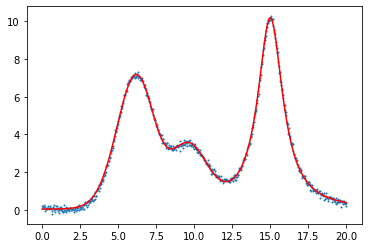

In [15]:
plt.scatter(x, data, 1)
plt.plot(x, out.best_fit, color = 'red')

In [16]:
# Load silicon sample
csv  = pd.read_csv('Phys-PK1_Si.csv', header = 29).to_numpy()

In [17]:
Si_x_data = csv[:, 0]
Si_y_data = csv[:, 1]
print(len(Si_x_data))
print(len(Si_y_data))

3529
3529


In [18]:
def smooth(data, win_size, polynomial):  # win_size = no. of data points of subset, polynomial = degree of polynomail
    smoothed_data = sig.savgol_filter(data, win_size, polynomial)
    return smoothed_data

y_smooth = smooth(Si_y_data, 9, 1)

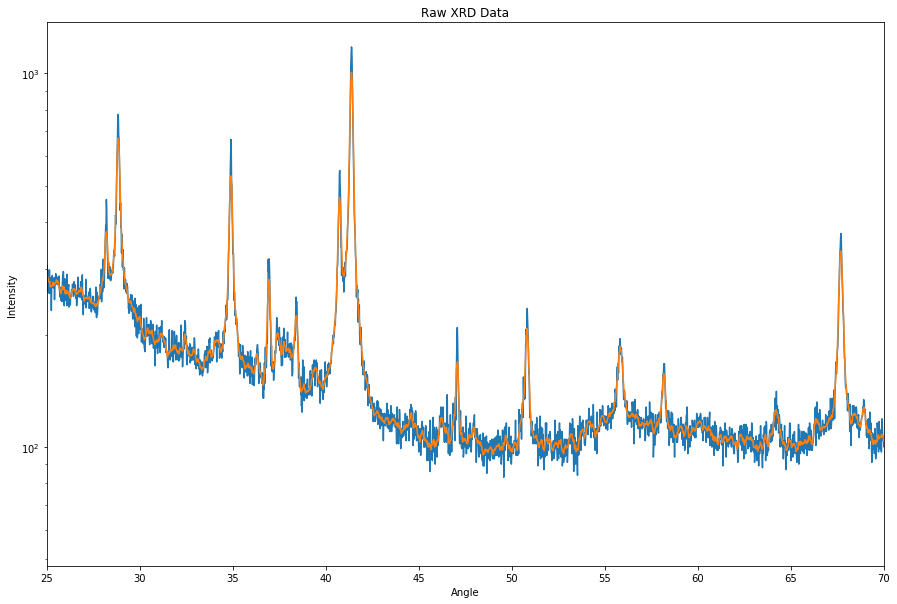

In [19]:
plt.subplots(figsize=(15, 10))
plt.plot(Si_x_data, Si_y_data)
plt.plot(Si_x_data, y_smooth)
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Raw XRD Data')
plt.xlim(25, 70)
plt.show()

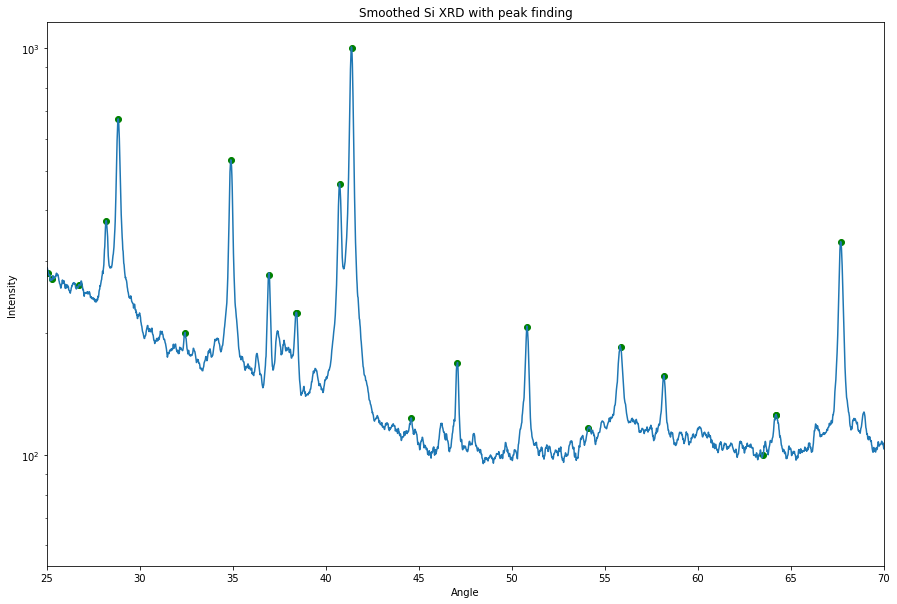

In [20]:
# Find peaks within data: adjust widths, gap_thresh, min_snr and noise_perc to achive optimum number of points

peak_indicies = sig.find_peaks_cwt(y_smooth, widths = (4, 15), gap_thresh = 4, min_snr = 1.7, noise_perc = 10)
quantile = np.quantile(Si_y_data, .60)
mean = np.mean(Si_y_data)

plt.subplots(figsize=(15, 10))
plt.plot(Si_x_data , y_smooth)
plt.scatter(Si_x_data[peak_indicies], y_smooth[peak_indicies], color = 'green')
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Smoothed Si XRD with peak finding')
plt.xlim(25, 70)
plt.show()

In [21]:
data_peaks = pd.DataFrame([Si_x_data[peak_indicies], y_smooth[peak_indicies]])
data_peaks = data_peaks.transpose()
data_peaks.columns = ['X_data', 'Y_data']

print(data_peaks.head())

   X_data      Y_data
0  25.083  280.222222
1  25.270  270.777778
2  26.749  262.111111
3  28.194  376.777778
4  28.840  669.444444


In [22]:
print(quantile)
print(mean)
    

120.0
141.24681212808161


In [23]:
df = pd.read_csv('Phys-PK1_Si.csv', header = 29)
print(df.head())

    Angle  Intensity
0  25.015      306.0
1  25.032      267.0
2  25.049      289.0
3  25.066      261.0
4  25.083      288.0


[[Model]]
    ((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(gaussian, prefix='g1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 551
    # data points      = 470
    # variables        = 9
    chi-square         = 112052.074
    reduced chi-square = 243.063068
    Akaike info crit   = 2590.77356
    Bayesian info crit = 2628.14815
[[Variables]]
    l1_amplitude:  161.756674 +/- 2.73895551 (1.69%) (init = 500)
    l1_center:     28.8336391 +/- 0.00141531 (0.00%) (init = 28)
    l1_sigma:      0.10021194 +/- 0.00219098 (2.19%) (init = 4)
    l1_fwhm:       0.20042388 +/- 0.00438197 (2.19%) == '2.0000000*l1_sigma'
    l1_height:     513.798552 +/- 7.27028258 (1.42%) == '0.3183099*l1_amplitude/max(2.220446049250313e-16, l1_sigma)'
    l2_amplitude:  36.4809020 +/- 2.09228944 (5.74%) (init = 900)
    l2_center:     28.1905625 +/- 0.00335240 (0.01%) (init = 28.8)
    l2_sigma:      0.06601834 +/- 0.00503625 (7.63%) (init = 4)
  

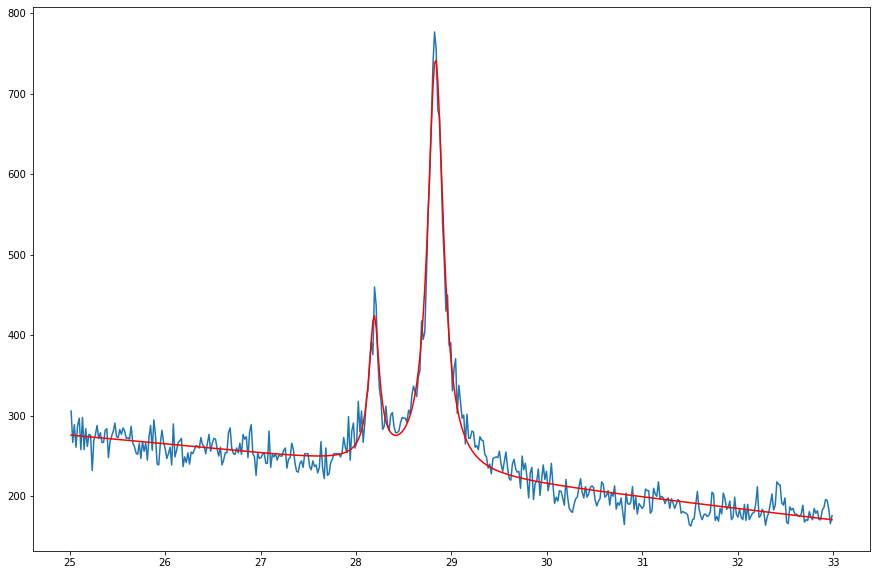

In [24]:
peak_1 = df['Angle'] < 33
peak_1 = df[peak_1]
peak_1 = peak_1.to_numpy()

plt.subplots(figsize = (15, 10))
plt.plot(peak_1[:, 0], peak_1[:, 1])

x1 = peak_1[:, 0]
y1 = peak_1[:, 1]

lorentz_1 = LorentzianModel(prefix = 'l1_')
par = lorentz_1.make_params()
par['l1_center'].set(value = 28.0)
par['l1_sigma'].set(value = 4)
par['l1_amplitude'].set(value = 500)

lorentz_2 = LorentzianModel(prefix = 'l2_')
par.update(lorentz_2.make_params())
par['l2_center'].set(value = 28.8)
par['l2_sigma'].set(value = 4.0)
par['l2_amplitude'].set(value = 900)

gauss_1 = GaussianModel(prefix = 'g1_')
par.update(gauss_1.make_params())
par['g1_center'].set(value = 28.5)
par['g1_sigma'].set(value = 5)
par['g1_amplitude'].set(value = 400)
model = lorentz_1 + lorentz_2 + gauss_1
out = model.fit(y1, par, x=x1)

print(out.fit_report())
plt.plot(x1, out.best_fit, color = 'red')

In [25]:
data2 = df[df['Angle'] < 36]
data2 = data2[data2['Angle'] > 33]
data2 = data2.to_numpy()
x2 = data2[:, 0]
y2 = data2[:, 1]

[[Model]]
    ((Model(lorentzian, prefix='l1_') + Model(gaussian, prefix='g1_')) + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1245
    # data points      = 177
    # variables        = 9
    chi-square         = 24866.5162
    reduced chi-square = 148.014977
    Akaike info crit   = 893.287605
    Bayesian info crit = 921.872953
[[Variables]]
    l1_amplitude:  112.420756 +/- 2.36212166 (2.10%) (init = 800)
    l1_center:     34.8912297 +/- 0.00113593 (0.00%) (init = 34)
    l1_sigma:      0.08003786 +/- 0.00195653 (2.44%) (init = 10)
    l1_fwhm:       0.16007573 +/- 0.00391306 (2.44%) == '2.0000000*l1_sigma'
    l1_height:     447.096388 +/- 6.37197587 (1.43%) == '0.3183099*l1_amplitude/max(2.220446049250313e-16, l1_sigma)'
    g1_amplitude:  2.75672437 +/- 1.65898721 (60.18%) (init = 300)
    g1_center:     33.0933885 +/- 0.03021386 (0.09%) (init = 34)
    g1_sigma:      0.06809368 +/- 0.03764842 (55.29%) (init = 10)
 

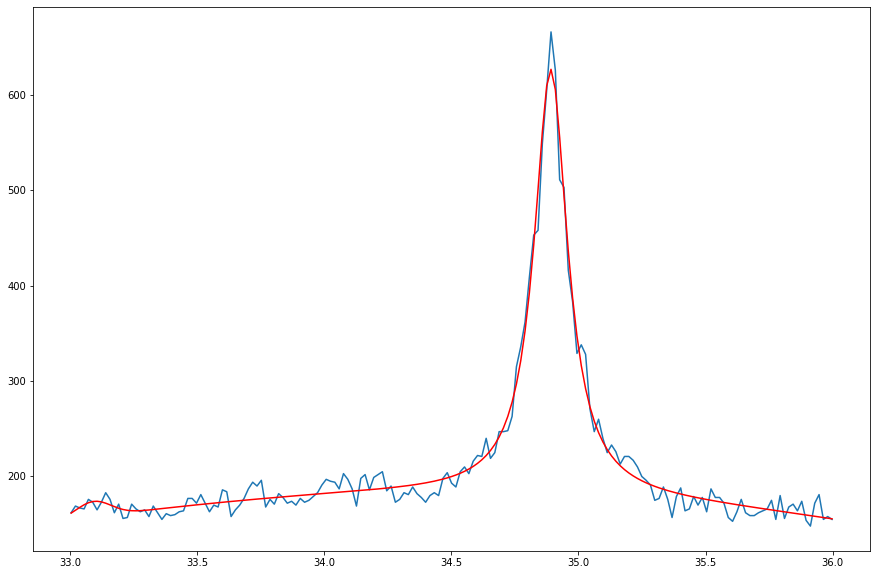

In [26]:
plt.subplots(figsize = (15, 10))
plt.plot(x2, y2)

lorentz_1 = LorentzianModel(prefix = 'l1_')
par = (lorentz_1.make_params())
par['l1_center'].set(value = 34.0)
par['l1_sigma'].set(value = 10)
par['l1_amplitude'].set(value  = 800)

gauss_1 = GaussianModel(prefix = 'g1_')
par.update(gauss_1.make_params())
par['g1_center'].set(value = 34)
par['g1_sigma'].set(value = 10)
par['g1_amplitude'].set(value = 300)
gauss_2 = GaussianModel(prefix = 'g2_')
par.update(gauss_2.make_params())
par['g2_center'].set(value = 34)
par['g2_sigma'].set(value = 10)
par['g2_amplitude'].set(value = 300)

model_1 = lorentz_1 + gauss_1 + gauss_2
out_1 = model_1.fit(y2, par, x = x2)
print(out_1.fit_report())
plt.plot(x2, out_1.best_fit, color = 'red')

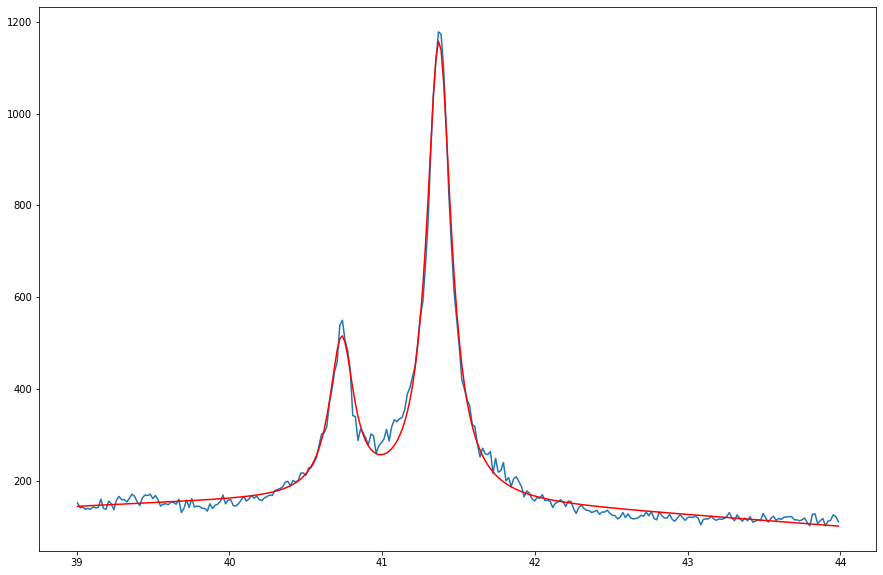

In [27]:
data3 = df[df['Angle'] < 44]
data3 = (data3[data3['Angle'] > 39]).to_numpy()
x3 = data3[:, 0]
y3 = data3[:, 1]

gauss_1 = GaussianModel(prefix = 'g1_')
par = gauss_1.make_params()
par['g1_center'].set(value = 41)
par['g1_sigma'].set(value = 10)
par['g1_amplitude'].set(value = 400)

lorentz_1 = LorentzianModel(prefix = 'l1_')
par.update(lorentz_1.make_params())
par['l1_center'].set(value = 40.8)
par['l1_sigma'].set(value = 5)
par['l1_amplitude'].set(value = 650)

lorentz_2 = LorentzianModel(prefix = 'l2_')
par.update(lorentz_2.make_params())
par['l2_center'].set(value = 41.5)
par['l2_sigma'].set(value = 5)
par['l2_amplitude'].set(value = 1400)

model_2 = gauss_1 + lorentz_1 + lorentz_2
out_2 = model_2.fit(y3, par, x = x3)

plt.subplots(figsize = (15, 10))
plt.plot(x3, y3)
plt.plot(x3, out_2.best_fit, color = 'red')

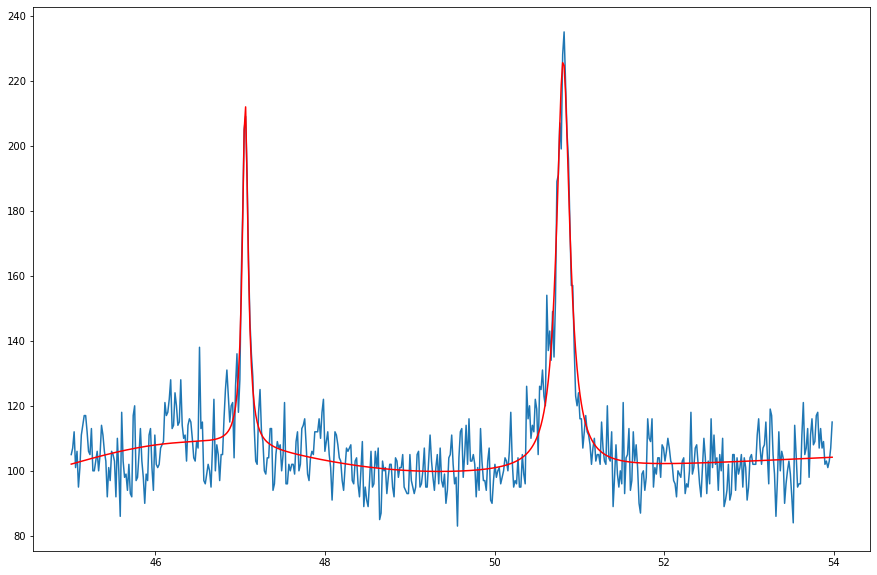

In [28]:
data4 = df[df['Angle'] < 54]
data4 = (data4[data4['Angle'] > 45]).to_numpy()
x4 = data4[:, 0]
y4 = data4[:, 1]

gauss_1 = GaussianModel(prefix = 'g1_')
par = gauss_1.make_params()
par['g1_center'].set(value = 47.0)
par['g1_sigma'].set(value = 10)
par['g1_amplitude'].set(value  = 155)

gauss_2 = GaussianModel(prefix= 'g2_')
par.update(gauss_2.make_params())
par['g2_center'].set(value = 51)
par['g2_sigma'].set(value = 10)
par['g2_amplitude'].set(value = 150)

lorentz_1 = LorentzianModel(prefix = 'l1_')
par.update(lorentz_1.make_params())
par['l1_center'].set(value = 47)
par['l1_sigma'].set(value = 5)
par['l1_amplitude'].set(value = 250)

lorentz_2 = LorentzianModel(prefix = 'l2_')
par.update(lorentz_2.make_params())
par['l2_center'].set(value = 51)
par['l2_sigma'].set(value = 5)
par['l2_amplitude'].set(value = 250)
model_3 = gauss_1 + gauss_2 + lorentz_1 + lorentz_2
out_3 = model_3.fit(y4, par, x = x4)
plt.subplots(figsize = (15, 10))
plt.plot(x4, y4)
plt.plot(x4, out_3.best_fit, color = 'red')

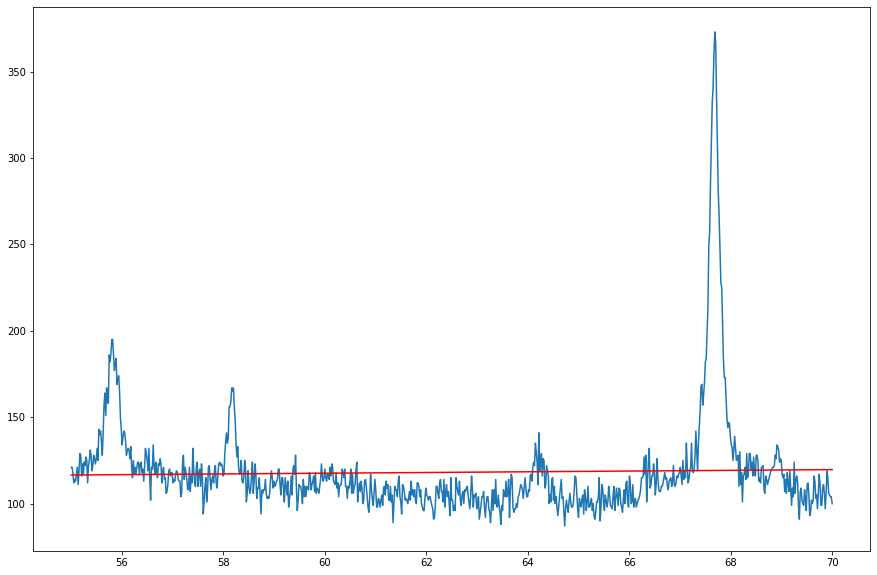

In [39]:
data5 = (df[df['Angle'] < 70])
data5 = (data5[data5['Angle'] > 55]).to_numpy()
x5 = data5[:, 0]
y5 = data5[:, 1]

lorentz_1= LorentzianModel(prefix = 'l1_')
par = lorentz_1.make_params()
par['l1_center'].set(value = 55)
par['l1_sigma'].set(value = 10)
par['l1_amplitude'].set(value = 250)

lorentz_2= LorentzianModel(prefix = 'l2_')
par.update(lorentz_2.make_params())
par['l2_center'].set(value = 55)
par['l2_sigma'].set(value = 10)
par['l2_amplitude'].set(value = 250)

gauss_1 = GaussianModel(prefix = 'g1_')
par.update(gauss_1.make_params())
par['g1_center'].set(value = 65)
par['g1_sigma'].set(value = 10)
par['g1_amplitude'].set(value = 200)

lorentz_3 = LorentzianModel(prefix = 'l3_')
par.update(lorentz_3.make_params())
par['l3_center'].set(value = 67)

model_3 = lorentz_1 + lorentz_2 + gauss_1
out_4 = model_3.fit(y5, par, x = x5)

plt.subplots(figsize = (15, 10))
plt.plot(x5, y5)
plt.plot(x5, out_4.best_fit, color = 'red')